# Multithreading and Multitasking in Python

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import urllib
import os
import time

#### Code profiling

In [3]:
#! pip install line_profiler
%load_ext line_profiler

In [4]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        l = [j ^(j>>i) for j in range (N)]
        total += sum(l)
    return total

In [5]:
%lprun -f sum_of_lists sum_of_lists(50)

Timer unit: 1e-09 s

Total time: 3.7e-05 s
File: /var/folders/rj/ls_3x1nx2q96t6562rd051_00000gn/T/ipykernel_20200/3275715010.py
Function: sum_of_lists at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def sum_of_lists(N):
     2         1          0.0      0.0      0.0      total = 0
     3         5       1000.0    200.0      2.7      for i in range(5):
     4         5      32000.0   6400.0     86.5          l = [j ^(j>>i) for j in range (N)]
     5         5       4000.0    800.0     10.8          total += sum(l)
     6         1          0.0      0.0      0.0      return total

In [6]:
def sum_of_lists_numpy(N):
    total = 0
    for i in range(5):
        l = np.array([j ^(j>>i) for j in range (N)])
        total += np.sum(l)
    return total

In [7]:
%lprun -f sum_of_lists_numpy sum_of_lists_numpy(50)

Timer unit: 1e-09 s

Total time: 0.000281 s
File: /var/folders/rj/ls_3x1nx2q96t6562rd051_00000gn/T/ipykernel_20200/493117017.py
Function: sum_of_lists_numpy at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def sum_of_lists_numpy(N):
     2         1       1000.0   1000.0      0.4      total = 0
     3         5       2000.0    400.0      0.7      for i in range(5):
     4         5     100000.0  20000.0     35.6          l = np.array([j ^(j>>i) for j in range (N)])
     5         5     178000.0  35600.0     63.3          total += np.sum(l)
     6         1          0.0      0.0      0.0      return total

#### MT and MP 
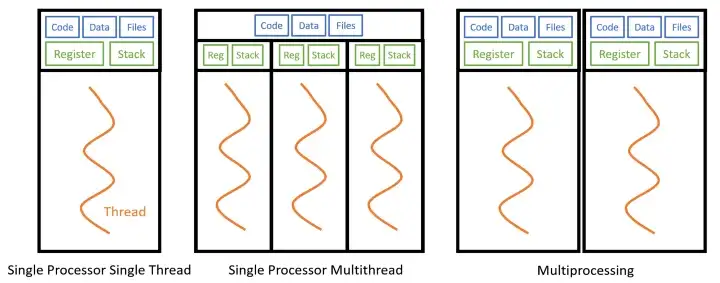
Source: https://towardsdatascience.com/multithreading-and-multiprocessing-in-10-minutes-20d9b3c6a867

#### Magic commands
https://ipython.readthedocs.io/en/stable/interactive/magics.html

In [2]:
import threading
import multiprocessing

In [3]:
def sum_range(start, end):
    total = 0
    for i in range(start, end):
        total += i
    return total

In [4]:
# decrease or increase n and see what happens
# n = 25000
n = 25000000

In [5]:
%%timeit

# Multithreading example
threads = []
for i in range(4):
    thread = threading.Thread(target=sum_range, args = (i*n, (i+1)*n))
    thread.start()
    threads.append(thread)
# Wait for all threads to complete
for thread in threads:
    thread.join()

2.71 s ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit

# Multiprocessing example
processes = []
for i in range(4):
    process = multiprocessing.Process(target=sum_range, args = (i*n, (i+1)*n))
    process.start()
    processes.append(process)
# Wait for all processes to complete
for process in processes:
    process.join()

#### I/O bound task

In [24]:
from multiprocessing.dummy import Pool as ThreadPool

In [25]:
urls = [
  'http://www.python.org',
  'http://www.python.org/about/',
  'http://www.onlamp.com/pub/a/python/2003/04/17/metaclasses.html',
  'http://www.python.org/doc/',
  'http://www.python.org/download/',
  'http://www.python.org/getit/',
  'http://www.python.org/community/',
  'https://wiki.python.org/moin/',
  'http://planet.python.org/',
  'https://wiki.python.org/moin/LocalUserGroups',
  'http://www.python.org/psf/',
  'http://docs.python.org/devguide/',
  'http://www.python.org/community/awards/'
  ]

In [28]:
%%timeit -n1 -r3

# Use one thread
results = []
for url in urls:
    result = urllib.request.urlopen(url)
    results.append(result)

5.08 s ± 498 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [29]:
%%timeit -n1 -r3

# Use ThreadPool but with only one thread
pool = ThreadPool(1)
pool.map(urllib.request.urlopen, urls)

4.94 s ± 448 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [30]:
%%timeit -n1 -r3

# Use ThreadPool with multiple threads
pool = ThreadPool(4)
pool.map(urllib.request.urlopen, urls)

2.12 s ± 293 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


Text(0, 0.5, 'Time [s]')

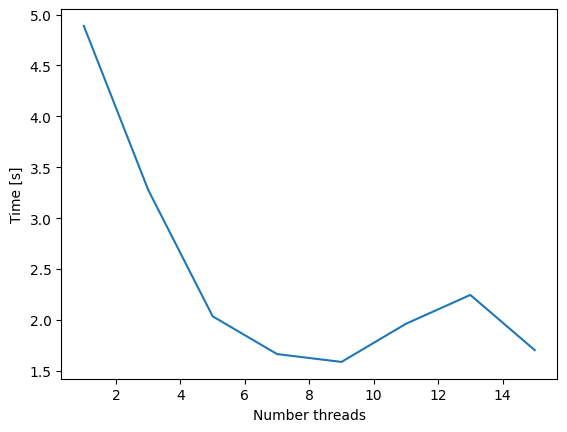

In [32]:
# find the optimal nb of threads
nb_threads = np.arange(1, 16, 2)
times = []

for nb_t in nb_threads:
    pool = ThreadPool(nb_t)
    t0 = time.time()
    pool.map(urllib.request.urlopen, urls)
    t1 = time.time()
    times.append(t1 - t0)
plt.plot(nb_threads, times)
plt.xlabel("Number threads")
plt.ylabel("Time [s]")

### concurrent.futures
https://docs.python.org/3/library/concurrent.futures.html#module-concurrent.futures

Using this for the previous example:

In [34]:
import concurrent.futures

In [36]:
%%timeit -n1 -r3
with concurrent.futures.ProcessPoolExecutor(5) as executor:
    results = executor.map(urllib.request.urlopen, urls)

2.26 s ± 349 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


Another example

In [ ]:
import concurrent.futures
import flammkuchen as fl

In [ ]:
os.mkdir("flammkuchen_files")

In [ ]:
def save_array(array, idx):
    fl.save(f"flammkuchen_files/fl_{idx}.dsss", array)

In [ ]:
arrays_with_idx = []
for i in range(10):
    

In [ ]:
%%timeit -n1 -r1
for array, idx in arrays_with_idx:
    save_array(array, idx)

In [ ]:
%%timeit -n1 -r1


In [ ]:
%%timeit -n1 -r1


### Ray

https://github.com/ray-project/ray

https://towardsdatascience.com/modern-parallel-and-distributed-python-a-quick-tutorial-on-ray-99f8d70369b8

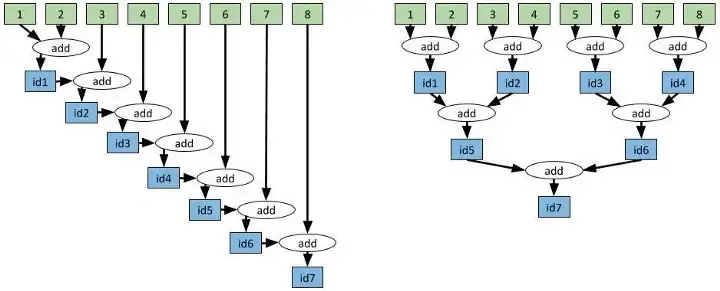

In [37]:
import ray  #!pip install ray
import time

In [38]:
@ray.remote
def add(x, y):
    return x + y

In [39]:
%%timeit
id1 = add.remote(1, 2)
id2 = add.remote(id1, 3)
id3 = add.remote(id2, 4)
id4 = add.remote(id3, 5)
id5 = add.remote(id4, 6)
id6 = add.remote(id5, 7)
id7 = add.remote(id6, 8)
result = ray.get(id7)

2023-01-28 19:42:17,979	INFO worker.py:1538 -- Started a local Ray instance.


3.55 ms ± 341 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%%timeit
id1 = add.remote(1, 2)
id2 = add.remote(3, 4)
id3 = add.remote(5, 6)
id4 = add.remote(7, 8)
id5 = add.remote(id1, id2)
id6 = add.remote(id3, id4)
id7 = add.remote(id5, id6)
result = ray.get(id7)

1.94 ms ± 24.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
